In [1]:
import pandas as pd


### Data Explore

In [2]:
df = pd.read_csv('../CO2_emission/data/CO2 Emissions_Canada.csv')

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.isnull().sum().sort_values(ascending=False)

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [5]:
print(len(df))
df = df.drop_duplicates()
print(len(df))

7385
6282


<AxesSubplot:>

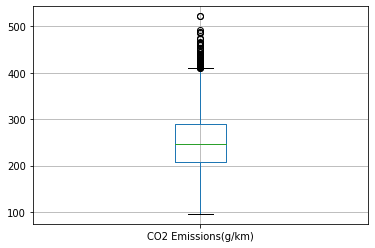

In [6]:
df[['CO2 Emissions(g/km)']].boxplot()

In [7]:
df['CO2 Emissions(g/km)'].min()

96

In [8]:
df['CO2 Emissions(g/km)'].max()

522

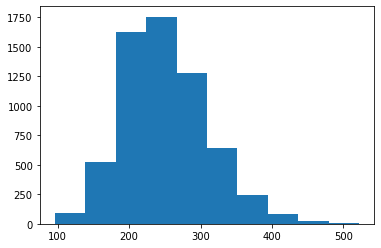

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['CO2 Emissions(g/km)']);

In [10]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
r_scaler.fit(df[['CO2 Emissions(g/km)']])
df['CO2 Emissions(g/km)'] = r_scaler.transform(df[['CO2 Emissions(g/km)']])
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,-0.617284
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,-0.308642
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,-1.358025
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,0.111111
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,-0.024691


In [11]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [12]:
df['Transmission'].value_counts()

AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

In [13]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [14]:
data = df

In [38]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
label_enc.fit(data[['Fuel Type']])
data['Fuel Type'] = label_enc.transform(data[['Fuel Type']])
data['Fuel Type'].unique()

array([4, 0, 3, 1, 2])

In [16]:
def clafi_transmition(i):
    if i[0] == 'A':
        if i[1] == 'M':
            return 1
        if i[1] == 'S':
            return  2
        if i[1] == 'V':
            return 3
        return 0
    if i[0] == 'M':
        return 4
    return 5
    

In [17]:
data['Transmission'] = data['Transmission'].apply(clafi_transmition)

In [18]:
data['Transmission'].unique()

array([2, 4, 3, 1, 0])

In [19]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,2,4,9.9,6.7,8.5,33,-0.617284
1,ACURA,ILX,COMPACT,2.4,4,4,4,11.2,7.7,9.6,29,-0.308642
2,ACURA,ILX HYBRID,COMPACT,1.5,4,3,4,6.0,5.8,5.9,48,-1.358025
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,2,4,12.7,9.1,11.1,25,0.111111
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,2,4,12.1,8.7,10.6,27,-0.024691
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,2,4,10.7,7.7,9.4,30,-0.333333
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,2,4,11.2,8.3,9.9,29,-0.172840
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,2,4,11.7,8.6,10.3,27,-0.074074
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,2,4,11.2,8.3,9.9,29,-0.172840


In [20]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Data Visualitation